In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score

**2.7.2** Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.

 

Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.

In [0]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
df.head()

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1


In [0]:
X_train = df.drop('num', axis=1)
y_train = df.num
#val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
clf = tree.DecisionTreeClassifier(criterion='entropy')
parametrs = {'max_depth': range(1,30)}
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

best_clf = grid_search_cv_clf.best_estimator_
N = best_clf.tree_.n_node_samples
entropy = best_clf.tree_.impurity
entr_yx = 0
ex = 0.9958
for i in range(0,3):
  a = N[i]*entropy[i]/238
  entr_yx = entr_yx + a
IG = ex - entr_yx
IG

-0.8765465896667817

[Text(167.4, 163.07999999999998, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.826\nsamples = 81\nvalue = [21, 60]')]

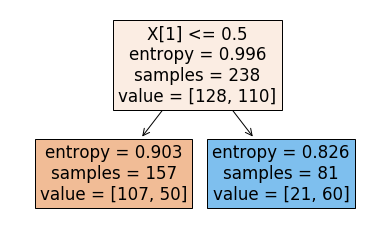

In [0]:
tree.plot_tree(best_clf, filled=True)

2.7.5 Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.

Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на тренировочный и тестовый наборы данных, 75% и 25% соответственно.
Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(x, y)
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
predicted=dt.predict(X_test)

2.7.8 Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search

In [0]:

iris = load_iris()
x = iris.data
y = iris.target
parameter_grid = {
            'max_depth': range(1,10),
            'min_samples_split': range(2,10),
            'min_samples_leaf':range(1,10)
    }
df = DecisionTreeClassifier()
search=GridSearchCV(df,parameter_grid)
search.fit(x, y)
best_tree = search.best_estimator_

2.7.9 Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV

максимальная глубина - от 1 до 10 уровней
минимальное число проб для разделения - от 2 до 10
минимальное число проб в листе - от 1 до 10
Cохраните в переменную best_tree лучшее дерево.

In [0]:
iris = load_iris()
x = iris.data
y = iris.target

clf = tree.DecisionTreeClassifier()
parametrs = {'max_depth': range(1,10), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2,10)}
search = RandomizedSearchCV(clf, parametrs, cv=5)
search.fit(x, y)
search.best_params_

best_tree = search.best_estimator_

**2.9**  Для каждого пользователя найдите такой шаг, который он не смог решить, и после этого не пытался решать другие шаги. Затем найдите id шага,  который стал финальной точкой практического обучения на курсе для максимального числа пользователей. 

In [0]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
df.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [0]:
wrong = df.query("submission_status == 'wrong'")
step = rr.groupby('step_id').agg({'submission_status': 'count'}).sort_values( by = 'submission_status', ascending = False )
step.head(5)

,submission_status
step_id,
31978,16084
32031,13373
32202,13002
33481,10300
32075,10003


In [0]:
correct = df.query("submission_status == 'correct'")
user = rr.groupby('user_id').agg({'submission_status': 'count'}).sort_values( by = 'submission_status', ascending = False )
user.head(5)

,submission_status
user_id,
1046,421
5552,186
17135,168
6183,142
8461,135
